In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1 - Écoulement autour d'un cylindre

On commence par définir les lignes de courant dans le voisinage du cylindre, en masquant celles qui sont à l'intérieur du cylindre

In [3]:
def psi_uniform(x, y):
    Z = np.zeros_like(np.real(x))
    exterior = (np.square(x)+np.square(y)) > 1.0
    Z[exterior] = y[exterior]
    interior = (np.square(x)+np.square(y)) <= 1.0
    Z[interior] = np.ma.masked
    return Z

In [4]:
def psi_source(x, y):
    Z = np.zeros_like(np.real(x))
    exterior = (np.square(x)+np.square(y)) > 1.0
    Z[exterior] = np.arctan(y[exterior]/x[exterior])
    interior = (np.square(x)+np.square(y)) <= 1.0
    Z[interior] = np.ma.masked
    return Z

In [5]:
xx = np.linspace(-3,3,500)
yy1 = np.linspace(-3,3,500)

In [6]:
x, y1 = np.meshgrid(xx, yy1)

In [7]:
theta = np.linspace(0, 2 * np.pi, num=100)
unit_circle = [np.exp(1j * _) for _ in theta] # sert pour tracer le cylindre en surimpression

[Text(0.5, 1.0, '(b)\\quad $\\psi_\\mathrm{source} = \\theta$')]

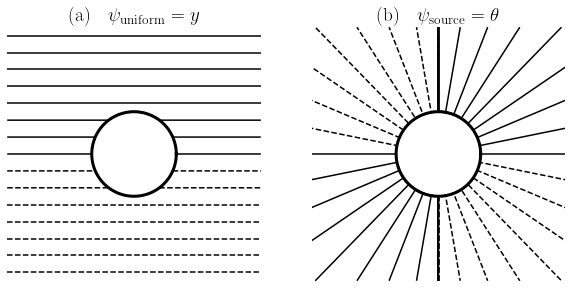

In [9]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size = 16)
ax[0].set_aspect('equal')
ax[0].contour(x, y1, psi_uniform(x, y1), 15, colors='black')
ax[0].plot(np.real(unit_circle), np.imag(unit_circle), 'k', linewidth=3)
ax[0].axis('off')
ax[0].set(title=r'(a)\quad $\psi_\mathrm{uniform} = y$')
ax[1].set_aspect('equal')
ax[1].contour(x, y1, psi_source(x, y1), 15, colors='black')
ax[1].plot(np.real(unit_circle), np.imag(unit_circle), 'k', linewidth=3)
ax[1].axis('off')
ax[1].set(title=r'(b)\quad $\psi_\mathrm{source} = \theta$')
#for axs in ax:
#    axs.set_anchor('N')
plt.savefig('uniform_source.pdf', transparent = True)
#plt.show() # commenter si savefig est utilisé

In [16]:
def psi_parallel(x, y):
    Z = np.zeros_like(np.real(x))
    exterior = (np.square(x)+np.square(y)) > 1.0
    Z[exterior] = -y[exterior]/(np.square(x[exterior])+np.square(y[exterior]))
    interior = (np.square(x)+np.square(y)) <= 1.0
    Z[interior] = np.ma.masked
    return Z

In [17]:
def psi_perp(x, y):
    Z = np.zeros_like(np.real(x))
    exterior = (np.square(x)+np.square(y)) > 1.0
    Z[exterior] = x[exterior]/(np.square(x[exterior])+np.square(y[exterior]))
    interior = (np.square(x)+np.square(y)) <= 1.0
    Z[interior] = np.ma.masked
    return Z

[Text(0.5, 1.0, '(b)\\quad $\\psi_\\perp$')]

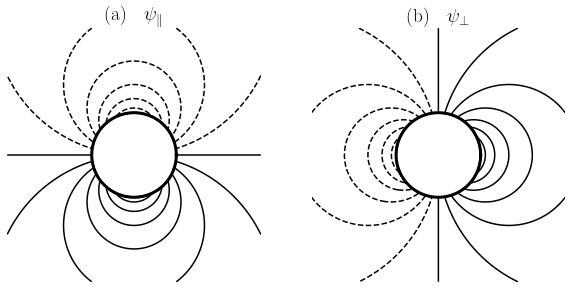

In [18]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size = 16)
ax[0].set_aspect('equal')
ax[0].contour(x, y1, psi_parallel(x, y1), 15, colors='black')
ax[0].plot(np.real(unit_circle), np.imag(unit_circle), 'k', linewidth=3)
ax[0].axis('off')
ax[0].set(title=r'(a)\quad $\psi_\parallel$')
ax[1].set_aspect('equal')
ax[1].contour(x, y1, psi_perp(x, y1), 15, colors='black')
ax[1].plot(np.real(unit_circle), np.imag(unit_circle), 'k', linewidth=3)
ax[1].axis('off')
ax[1].set(title=r'(b)\quad $\psi_\perp$')
#for axs in ax:
#    axs.set_anchor('N')
plt.savefig('psi_dipoles.pdf', transparent = True)
#plt.show() # commenter si savefig est utilisé

[Text(0.5, 1.0, ' $\\psi$ around the cylinder')]

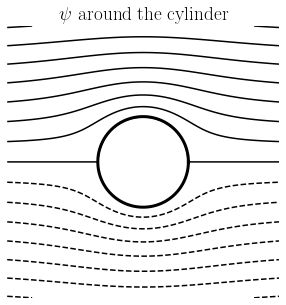

In [20]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size = 16)
ax.set_aspect('equal')
ax.contour(x, y1, psi_uniform(x, y1)+psi_parallel(x, y1), 15, colors='black')
ax.plot(np.real(unit_circle), np.imag(unit_circle), 'k', linewidth=3)
ax.axis('off')
ax.set(title=r' $\psi$ around the cylinder')

In [21]:
def psi_aspi(x, y, aspi):
    Z = np.zeros_like(np.real(x))
    rsq = x*x + y*y
    exterior = (np.square(x)+np.square(y)) > 1.0
    Z[exterior] = y[exterior] - y[exterior]/rsq[exterior] - aspi* np.arctan2(y[exterior],x[exterior])
    interior = (np.square(x)+np.square(y)) <= 1.0
    Z[interior] = np.ma.masked
    return Z

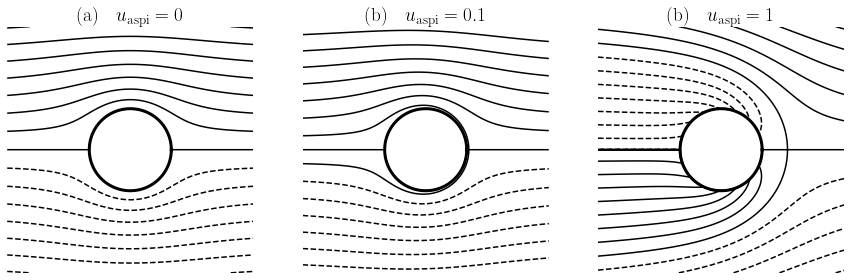

In [22]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size = 16)
ax[0].set_aspect('equal')
ax[0].contour(x, y1, psi_aspi(x, y1, 0.), 15, colors='black')
ax[0].plot(np.real(unit_circle), np.imag(unit_circle), 'k', linewidth=3)
ax[0].axis('off')
ax[0].set(title=r'(a)\quad $u_\mathrm{aspi} = 0$')
ax[1].set_aspect('equal')
ax[1].contour(x, y1, psi_aspi(x, y1, 0.1), 15, colors='black')
ax[1].plot(np.real(unit_circle), np.imag(unit_circle), 'k', linewidth=3)
ax[1].axis('off')
ax[1].set(title=r'(b)\quad $u_\mathrm{aspi} = 0.1$')
ax[2].set_aspect('equal')
ax[2].contour(x, y1, psi_aspi(x, y1, 1), 15, colors='black')
ax[2].plot(np.real(unit_circle), np.imag(unit_circle), 'k', linewidth=3)
ax[2].axis('off')
ax[2].set(title=r'(b)\quad $u_\mathrm{aspi} = 1$')


#for axs in ax:
#    axs.set_anchor('N')
plt.savefig('aspi.pdf', transparent = True)
#plt.show() # commenter si savefig est utilisé